# Q2.2: Iris Autoencoder Bottleneck Neurons (2 vs 3)

Compare autoencoders with **2-neuron vs 3-neuron** bottleneck layers on Iris.

**Exam outputs:** loss curves and reconstruction error comparison; optionally latent-space visualization.

## Step 1: Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

## Step 2: Load and Normalize Data

In [2]:
iris = load_iris()
X = iris.data

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

print(f"Data Shape: {X_norm.shape}")
print(f"Features: {iris.feature_names}")

Data Shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Step 3: Build Autoencoder with 2 Neurons

### Define Model

In [3]:
# Input
inp_2 = Input(shape=(4,))

# Encoder: 4 -> 2
encoded_2 = Dense(2, activation='relu', name='encoded_2')(inp_2)

# Decoder: 2 -> 4
decoded_2 = Dense(4, activation='sigmoid', name='decoded_2')(encoded_2)

# Models
autoencoder_2 = Model(inp_2, decoded_2)
encoder_2 = Model(inp_2, encoded_2)

autoencoder_2.compile(optimizer='adam', loss='mse')
print("Autoencoder with 2 neurons in bottleneck:")
autoencoder_2.summary()

Autoencoder with 2 neurons in bottleneck:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoded_2 (Dense)               │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoded_2 (Dense)               │ (None, 4)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22 (88.00 B)

 Trainable params: 22 (88.00 B)

 Non-trainable params: 0 (0.00 B)

### Train Model

In [4]:
history_2 = autoencoder_2.fit(X_norm, X_norm,
                              epochs=100,
                              batch_size=16,
                              shuffle=True,
                              verbose=0)
print("Training completed for 2-neuron autoencoder")

Training completed for 2-neuron autoencoder


## Step 4: Build Autoencoder with 3 Neurons

### Define Model

In [5]:
# Input
inp_3 = Input(shape=(4,))

# Encoder: 4 -> 3
encoded_3 = Dense(3, activation='relu', name='encoded_3')(inp_3)

# Decoder: 3 -> 4
decoded_3 = Dense(4, activation='sigmoid', name='decoded_3')(encoded_3)

# Models
autoencoder_3 = Model(inp_3, decoded_3)
encoder_3 = Model(inp_3, encoded_3)

autoencoder_3.compile(optimizer='adam', loss='mse')
print("\nAutoencoder with 3 neurons in bottleneck:")
autoencoder_3.summary()


Autoencoder with 3 neurons in bottleneck:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoded_3 (Dense)               │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoded_3 (Dense)               │ (None, 4)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

### Train Model

In [6]:
history_3 = autoencoder_3.fit(X_norm, X_norm,
                              epochs=100,
                              batch_size=16,
                              shuffle=True,
                              verbose=0)
print("Training completed for 3-neuron autoencoder")

Training completed for 3-neuron autoencoder


## Step 5: Display Reduced Dimension Values

### 2-Neuron Encoded Representation

In [7]:
encoded_data_2 = encoder_2.predict(X_norm, verbose=0)

print("2-Neuron Bottleneck - Encoded Representation:")
print(f"Shape: {encoded_data_2.shape}")
print(f"\nFirst 10 samples:\n{encoded_data_2[:10]}")

2-Neuron Bottleneck - Encoded Representation:
Shape: (150, 2)

First 10 samples:
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


### 3-Neuron Encoded Representation

In [8]:
encoded_data_3 = encoder_3.predict(X_norm, verbose=0)

print("\n3-Neuron Bottleneck - Encoded Representation:")
print(f"Shape: {encoded_data_3.shape}")
print(f"\nFirst 10 samples:\n{encoded_data_3[:10]}")


3-Neuron Bottleneck - Encoded Representation:
Shape: (150, 3)

First 10 samples:
[[0.         0.         0.499823  ]
 [0.         0.00517222 0.3016809 ]
 [0.         0.         0.38979617]
 [0.         0.         0.37962258]
 [0.         0.         0.5501032 ]
 [0.         0.10745449 0.65940356]
 [0.         0.         0.48238477]
 [0.         0.         0.47720447]
 [0.         0.         0.2970508 ]
 [0.         0.         0.36960572]]


## Step 6: Plot Loss vs Epoch

### Compare Training Loss

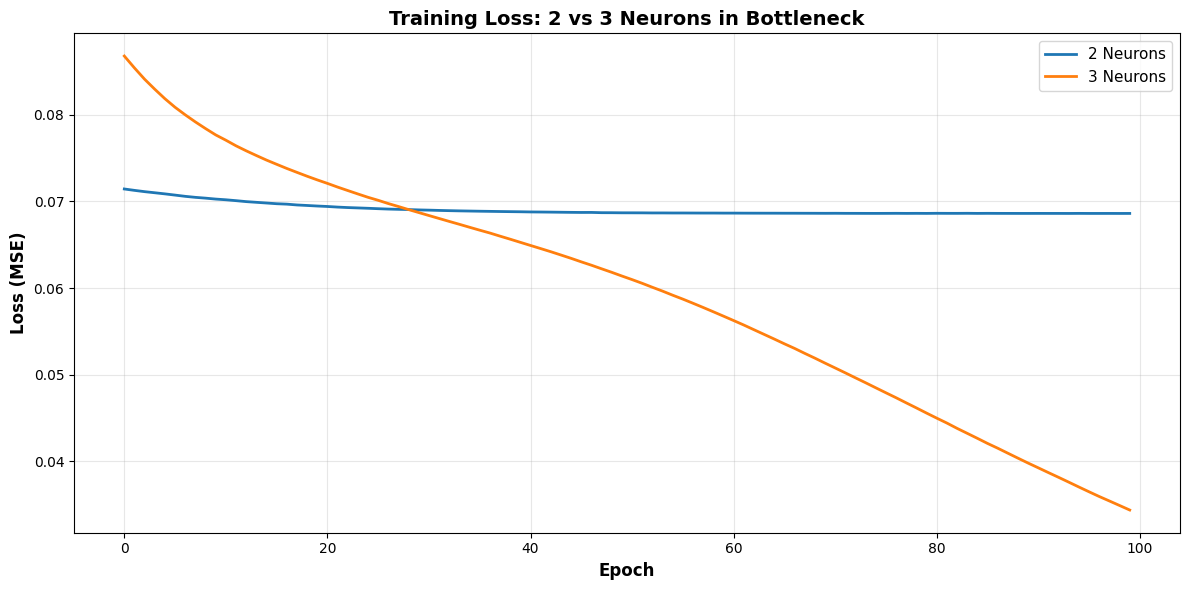

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(history_2.history['loss'], label='2 Neurons', linewidth=2)
plt.plot(history_3.history['loss'], label='3 Neurons', linewidth=2)
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
plt.title('Training Loss: 2 vs 3 Neurons in Bottleneck', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Step 7: Calculate Reconstruction Error (MSE)

### 2-Neuron MSE

In [10]:
decoded_data_2 = autoencoder_2.predict(X_norm, verbose=0)
mse_2 = np.mean((X_norm - decoded_data_2) ** 2)

print(f"2-Neuron Autoencoder:")
print(f"Reconstruction MSE: {mse_2:.6f}")
print(f"Final Training Loss: {history_2.history['loss'][-1]:.6f}")

2-Neuron Autoencoder:
Reconstruction MSE: 0.068612
Final Training Loss: 0.068616


### 3-Neuron MSE

In [11]:
decoded_data_3 = autoencoder_3.predict(X_norm, verbose=0)
mse_3 = np.mean((X_norm - decoded_data_3) ** 2)

print(f"\n3-Neuron Autoencoder:")
print(f"Reconstruction MSE: {mse_3:.6f}")
print(f"Final Training Loss: {history_3.history['loss'][-1]:.6f}")


3-Neuron Autoencoder:
Reconstruction MSE: 0.034087
Final Training Loss: 0.034393


## Step 8: Comparison Summary

### Display Comparison Table

In [12]:
print("\n" + "="*60)
print("AUTOENCODER COMPARISON: 2 vs 3 NEURONS")
print("="*60)
print(f"{'Metric':<30} | {'2 Neurons':<13} | {'3 Neurons':<13}")
print("-"*60)
print(f"{'Bottleneck Dimensions':<30} | {2:<13} | {3:<13}")
print(f"{'Reconstruction MSE':<30} | {mse_2:<13.6f} | {mse_3:<13.6f}")
print(f"{'Final Training Loss':<30} | {history_2.history['loss'][-1]:<13.6f} | {history_3.history['loss'][-1]:<13.6f}")
print("="*60)

if mse_2 < mse_3:
    print(f"\n2-neuron model has better reconstruction (lower MSE)")
else:
    print(f"\n3-neuron model has better reconstruction (lower MSE)")


AUTOENCODER COMPARISON: 2 vs 3 NEURONS
Metric                         | 2 Neurons     | 3 Neurons    
------------------------------------------------------------
Bottleneck Dimensions          | 2             | 3            
Reconstruction MSE             | 0.068612      | 0.034087     
Final Training Loss            | 0.068616      | 0.034393     

3-neuron model has better reconstruction (lower MSE)


### Visualize MSE Comparison

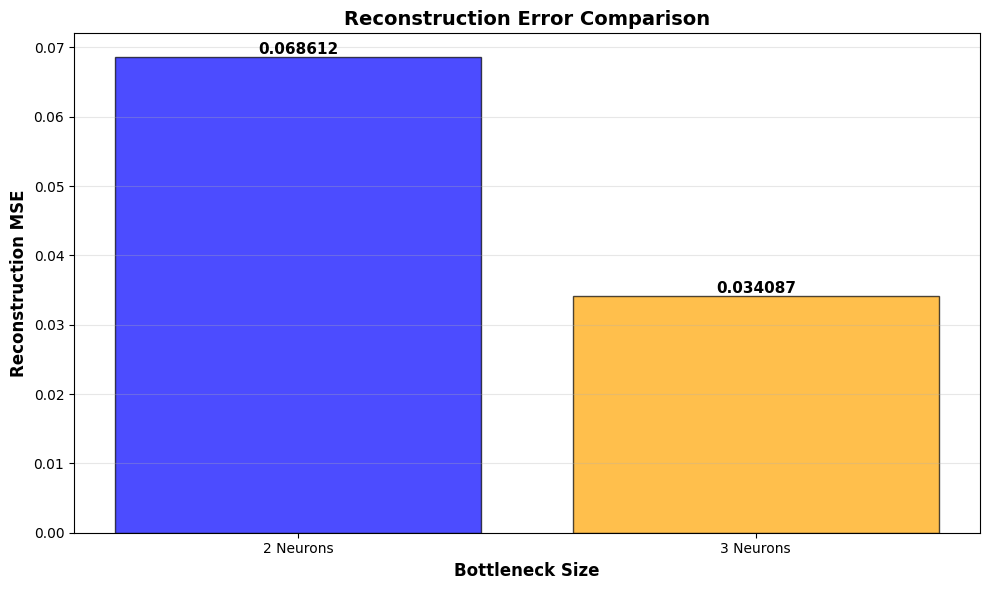

In [13]:
neurons = ['2 Neurons', '3 Neurons']
mse_values = [mse_2, mse_3]

plt.figure(figsize=(10, 6))
bars = plt.bar(neurons, mse_values, color=['blue', 'orange'], alpha=0.7, edgecolor='black')
plt.xlabel('Bottleneck Size', fontsize=12, fontweight='bold')
plt.ylabel('Reconstruction MSE', fontsize=12, fontweight='bold')
plt.title('Reconstruction Error Comparison', fontsize=14, fontweight='bold')

# Add value labels on bars
for bar, mse in zip(bars, mse_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{mse:.6f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Summary

**Key Observations:**
- 3-neuron bottleneck typically achieves lower reconstruction error
- More neurons retain more information (less compression)
- 2-neuron provides better visualization in 2D space
- Trade-off between compression and reconstruction accuracy